# Consumption of cocaine
#### Artur Skowroński, 411423

In [1]:
# Handling the data
import pandas as pd
import numpy as np
import datetime

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modelling
from sklearn import preprocessing

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif  # for discrete target variable
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

Your task is to apply various ML algorithms (see the rules below) to build a model explaining whether a particular person **consumed cocaine in the last month** based on the **training sample** and generate predictions for **all observations** from the **test sample**.

The dataset includes the following columns:

- *id* – unique observation identifier
- *age* – age group of the person with the following levels: 18-24, 25-34, 35-44, 45-54, 55-64, 65+
- *gender* – gender of the person with the following levels: female, male
- *education* – education level of the person with the following levels: Left school before 16 years, Left school at 16 years, Left school at 17 years, Left school at 18 years, Some college or university, no certificate or degree, Professional certificate/ diploma, University degree, Masters degree, Doctorate degree
- *country* – country of current residence of the person with the following levels: Australia, Canada, New Zealand, Ireland, UK, USA, Other
- *ethnicity* – ethnicity of the person with the following levels: Asian, Black, Mixed-Black/Asian, Mixed-White/Asian, Mixed-White/Black, White, Other
- *personality_neuroticism* – assessment of neuroticism of the person based on psychological tests (0-100)
- *personality_extraversion* – assessment of extraversion of the person based on psychological tests (0-100)
- *personality_openness* – assessment of openness to experience of the person based on psychological tests (0-100)
- *personality_agreeableness* – assessment of agreeableness of the person based on psychological tests (0-100)
- *personality_conscientiousness* – assessment of conscientiousness of the person based on psychological tests (0-100)
- *personality_impulsiveness* – assessment of impulsiveness of the person based on psychological tests (0-100)
- *personality_sensation* – assessment of sensation of the person based on psychological tests (0-100)
- *consumption_alcohol* – declared consumption of alcohol with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- *consumption_amphetamines* – declared consumption of amphetamines with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- *consumption_caffeine* – declared consumption of caffeine with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- *consumption_cannabis* – declared consumption of cannabis with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- *consumption_chocolate* – declared consumption of chocolate with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- *consumption_mushrooms* – declared consumption of magic mushrooms with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- *consumption_nicotine* – declared consumption of nicotine with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- *consumption_cocaine_last_month* – declared consumption of cocaine in the last month with the following levels: No, Yes (outcome variable, only in the training sample)

## 1. Import and understand the data

In [2]:
train_org = pd.read_csv("drugs_train.csv")
test_org = pd.read_csv("drugs_test.csv")

train = train_org.copy()
test = test_org.copy()

display(train.head())

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,...,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month
0,train_0001,45-54,male,Masters degree,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,...,42.8,22.4,used in last week,used over a decade ago,used in last day,used in last week,used in last day,never used,used in last week,No
1,train_0002,25-34,male,University degree,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,...,33.8,30.8,used in last week,never used,used in last week,never used,used in last day,never used,never used,No
2,train_0003,18-24,female,University degree,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,...,63.0,62.0,used in last month,never used,used in last day,used in last week,used in last week,used in last year,used in last month,No
3,train_0004,25-34,female,Masters degree,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,...,63.0,71.1,used in last day,never used,used in last day,used in last decade,used in last day,never used,used in last decade,No
4,train_0005,18-24,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,...,50.4,62.0,used in last week,never used,used in last month,used in last month,used in last day,used in last year,used in last month,No


In [3]:
display(train.sample())

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,...,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month
1295,train_1296,25-34,female,Left school at 18 years,New Zealand,Mixed-Black/Asian,73.5,25.1,70.2,39.0,...,33.8,22.4,used in last week,used in last week,used in last day,used in last week,used in last month,never used,used in last week,No


In [4]:
display(test.head())

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine
0,test_0001,18-24,female,"Some college or university, no certificate or ...",USA,Mixed-Black/Asian,37.7,74.2,60.2,45.6,40.6,63.0,71.1,used in last day,never used,used in last day,used in last week,used in last day,used in last decade,used in last day
1,test_0002,45-54,male,Doctorate degree,USA,Other,62.3,47.6,73.1,43.5,60.9,56.5,71.1,used in last day,used over a decade ago,used in last day,used in last decade,used in last month,never used,used in last decade
2,test_0003,45-54,female,Professional certificate/ diploma,USA,Mixed-Black/Asian,56.1,52.6,34.9,58.5,58.4,56.5,38.8,used in last week,never used,used in last day,never used,used in last day,never used,never used
3,test_0004,35-44,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,71.8,50.1,45.7,39.0,42.4,63.0,46.6,used in last decade,never used,used in last day,used in last day,used in last week,never used,used in last day
4,test_0005,35-44,male,Left school at 16 years,USA,Mixed-Black/Asian,62.3,41.2,19.2,39.0,22.3,42.8,38.8,used in last decade,used in last day,used in last day,used in last day,used in last week,used over a decade ago,used in last day


In [5]:
print(train.shape, test.shape)

(1500, 21) (385, 20)


In [6]:
# ID is not changing anything in the data, so I won't use it
test["consumption_cocaine_last_month"] = float("NAN")
data_org = pd.concat((train.loc[:,'age':'consumption_cocaine_last_month'],
                  test.loc[:,'age':'consumption_cocaine_last_month']))
data = data_org.copy()

In [7]:
data.dtypes

age                                object
gender                             object
education                          object
country                            object
ethnicity                          object
personality_neuroticism           float64
personality_extraversion          float64
personality_openness              float64
personality_agreeableness         float64
personality_conscientiousness     float64
personality_impulsiveness         float64
personality_sensation             float64
consumption_alcohol                object
consumption_amphetamines           object
consumption_caffeine               object
consumption_cannabis               object
consumption_chocolate              object
consumption_mushrooms              object
consumption_nicotine               object
consumption_cocaine_last_month     object
dtype: object

### 1.1. Numerical data

My goal is to predict, if particular person consumed cocaine in the last month.

In [8]:
train.describe()

,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51.507267,50.053667,53.108667,49.966000,49.998800,46.972200,52.316333
std,14.958815,15.200954,16.049880,14.340301,14.571548,17.361892,23.686221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.300000,39.400000,41.400000,41.200000,40.600000,33.800000,38.800000
50%,52.000000,50.100000,52.700000,49.800000,49.900000,42.800000,54.000000
75%,60.800000,59.700000,64.700000,58.500000,58.400000,56.500000,71.100000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [9]:
data.describe()

,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,51.412361,49.999151,53.008382,49.999735,49.986578,46.946419,51.883873
std,14.811244,15.229331,16.127186,14.397983,14.397057,17.495772,24.102864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.300000,39.400000,41.400000,41.200000,40.600000,33.800000,38.800000
50%,52.000000,50.100000,52.700000,49.800000,49.900000,42.800000,54.000000
75%,60.800000,59.700000,64.700000,61.000000,58.400000,56.500000,71.100000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### TO DO: JAKIES WNIOSKI 
everything looks fine xD


### 1.2. Characteric data

In [10]:
char_features = data.select_dtypes(include=['object'])
for col in char_features.columns:
    x = char_features[col].value_counts()
    print("Column name is:",col,"and it value is:\n",x)

Column name is: age and it value is:
 18-24    643
25-34    481
35-44    356
45-54    294
55-64     93
65+       18
Name: age, dtype: int64
Column name is: gender and it value is:
 female    943
male      942
Name: gender, dtype: int64
Column name is: education and it value is:
 Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       270
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: education, dtype: int64
Column name is: country and it value is:
 USA            1044
Australia       557
New Zealand     118
UK               87
Other            54
Ireland 

## 2. Explanatory Data Analysis

Let's check numerical statistics of person who dose cocaine last month

In [11]:
cocaine_user = data[data['consumption_cocaine_last_month'] == 'Yes'].describe().drop(index='count')
cocaine_user

,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation
mean,55.222835,52.668504,56.540157,44.850394,46.231496,54.551181,67.220472
std,14.420027,19.081000,15.943742,15.572212,13.509718,16.012242,22.261759
min,14.000000,0.000000,19.200000,0.000000,8.100000,21.500000,0.000000
25%,46.200000,37.700000,45.700000,34.500000,35.400000,42.800000,54.000000
50%,56.100000,52.600000,55.300000,43.500000,46.000000,56.500000,71.100000
75%,64.900000,67.000000,64.700000,56.300000,56.000000,63.000000,82.600000
max,88.000000,100.000000,100.000000,79.400000,83.700000,100.000000,100.000000


Let's compare numerical statistics, of people who dose cocaine and who don't

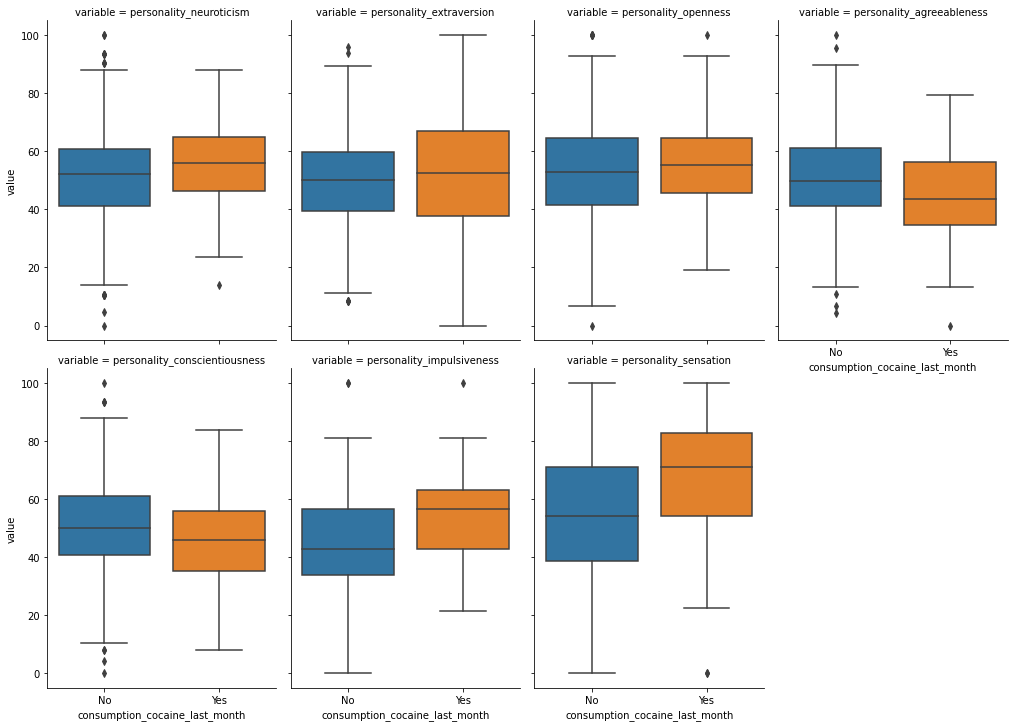

In [12]:
numerical_features = cocaine_user.columns
data_comparison = pd.concat([train[['consumption_cocaine_last_month']], train[numerical_features]], axis = 1)
data_comparison = data_comparison.melt(id_vars='consumption_cocaine_last_month')

sns.catplot(
    data=data_comparison, x='consumption_cocaine_last_month', y='value',
    col='variable', kind='box', col_wrap=4, height=5, aspect=0.7
)

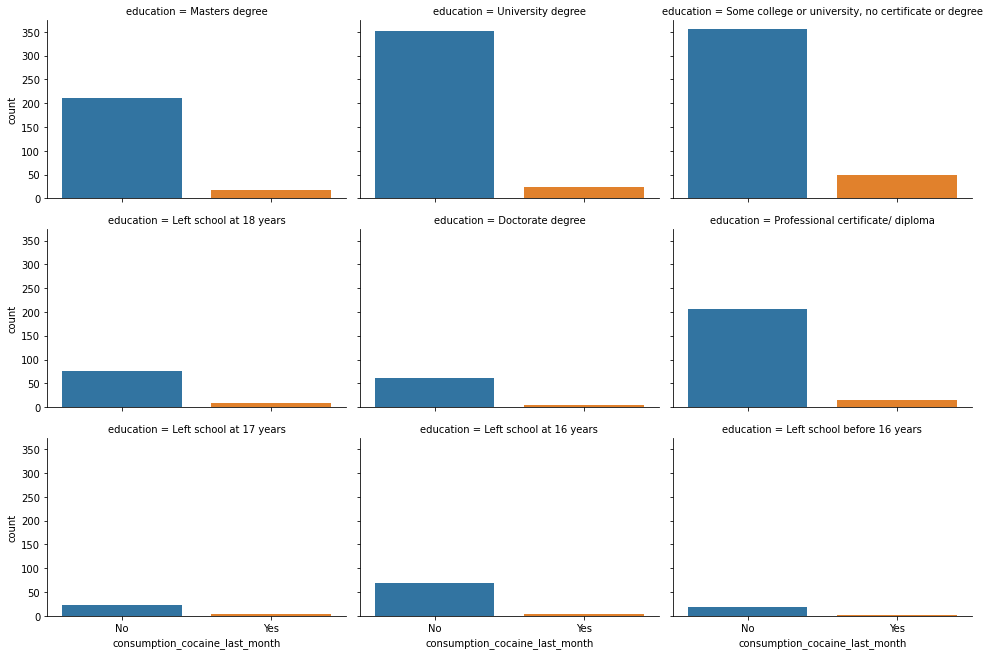

In [13]:
sns.catplot(x="consumption_cocaine_last_month", col="education", col_wrap=3,
            data=train,
            kind="count", height=3, aspect=1.5)

We see, that in some variables, there are differences, what's more there are also outliers, which may influence on our future estimations.

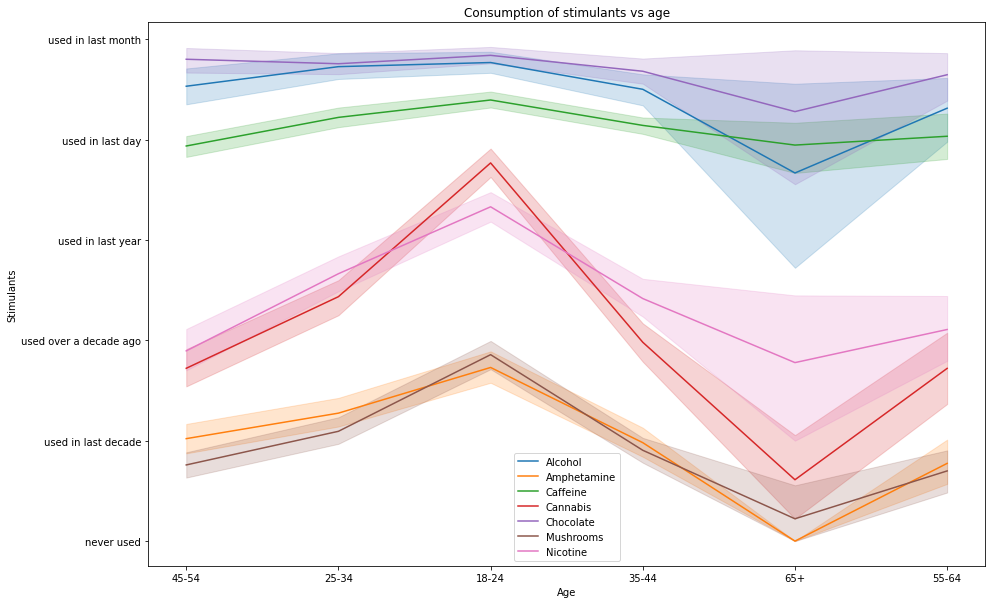

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(data.age, data.consumption_alcohol, label='Alcohol')
sns.lineplot(data.age, data.consumption_amphetamines, label = 'Amphetamine')
sns.lineplot(data.age, data.consumption_caffeine, label = 'Caffeine')
sns.lineplot(data.age, data.consumption_cannabis, label = 'Cannabis')
sns.lineplot(data.age, data.consumption_chocolate, label = 'Chocolate')
sns.lineplot(data.age, data.consumption_mushrooms, label = 'Mushrooms')
sns.lineplot(data.age, data.consumption_nicotine, label = 'Nicotine')
plt.title('Consumption of stimulants vs age')
plt.ylabel('Stimulants')
plt.xlabel('Age')
plt.show()

Let me analise it, age after age:
- 18-24 
First of all, it is quite normal that young people are the most likely to "experiment". Secondly, they are simply the most numerous in our dataset. Surprisingly, quite a few young people admitted to having taken amphetamines and mushrooms "in the previous decade". It may be worthwhile to investigate the validity of the data for these two variables.
- 25-34
The next group seems to be very similar to the previous one and, in my opinion, we do not observe any significant deviations.
- 35-44/45-54/55-64
For this age group, it can be seen that people are less and less likely to use stimulants, which may indicate their maturity in life.
- 65 +
For the latter age group, there is far less uptake of stimulants and people are cutting back significantly. Therefore, in this age group, we are likely to have only isolated cases of cocaine use in the previous month.

Overall, the smallest deviations among 'frequency of use' relative to age are found for chocolate, caffeine and alcohol. Therefore, I suggest that possibly cocaine consumption will not depend on these 3 variables.\
The situation is quite different among less legal/illegal substances. I might be tempted to say that users of these substances are more likely to dose cocaine.


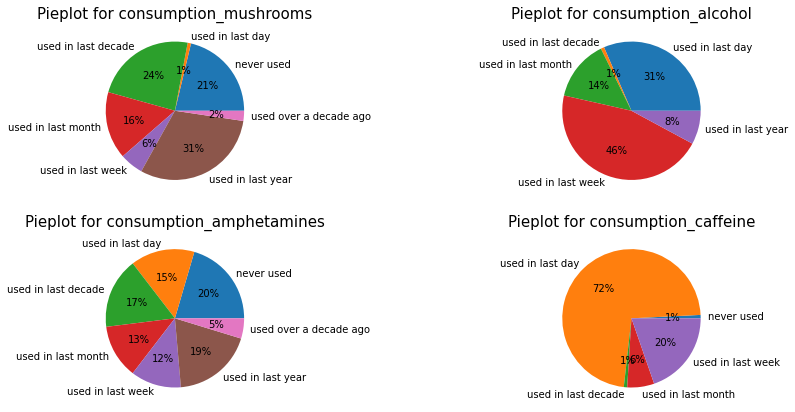

In [15]:
def cocaine_consumption_per_stimulants(variables):
    
    fig, axs = plt.subplots(2, 2, figsize = (15,7))
    df_to_plot = []
    
    for variable in variables:
        temp = data.groupby([data[variable], data.consumption_cocaine_last_month]).size().reset_index(name='counts')
        temp = temp[temp.consumption_cocaine_last_month == 'Yes']
        sum_all = sum(temp.counts)
        temp["percentage"] = temp.counts.apply(lambda x: x/sum_all)
        to_add = temp.query('consumption_cocaine_last_month == "Yes"')[['{}'.format(variable),'percentage']]
        df_to_plot.append(to_add)
    
    for rows in range(0, 2):
        for cols in range(0, 2):
            axs[rows][cols].pie(df_to_plot[cols+rows if cols==0 else rows+cols+1].percentage, 
                                      labels = df_to_plot[cols+rows if cols==0 else rows+cols+1].iloc[:, 0],
                                      autopct = '%.0f%%')
            axs[rows][cols].set_title('Pieplot for {}'.format(variables[cols+rows if cols==0 else rows+cols+1]),
                                      fontsize = 15)

            
cocaine_consumption_per_stimulants(['consumption_mushrooms',
                                    'consumption_amphetamines', 
                                    'consumption_alcohol',
                                    'consumption_caffeine'])

In [16]:
new = data.groupby([data.consumption_alcohol, data.consumption_cocaine_last_month]).size().reset_index(name='counts')
new = new[new.consumption_cocaine_last_month == 'Yes']
sum_all = sum(new.counts)

new["percentage"] = new.counts.apply(lambda x: x/sum_all)
new


,consumption_alcohol,consumption_cocaine_last_month,counts,percentage
2,used in last day,Yes,40,0.314961
4,used in last decade,Yes,1,0.007874
6,used in last month,Yes,18,0.141732
8,used in last week,Yes,58,0.456693
10,used in last year,Yes,10,0.078740


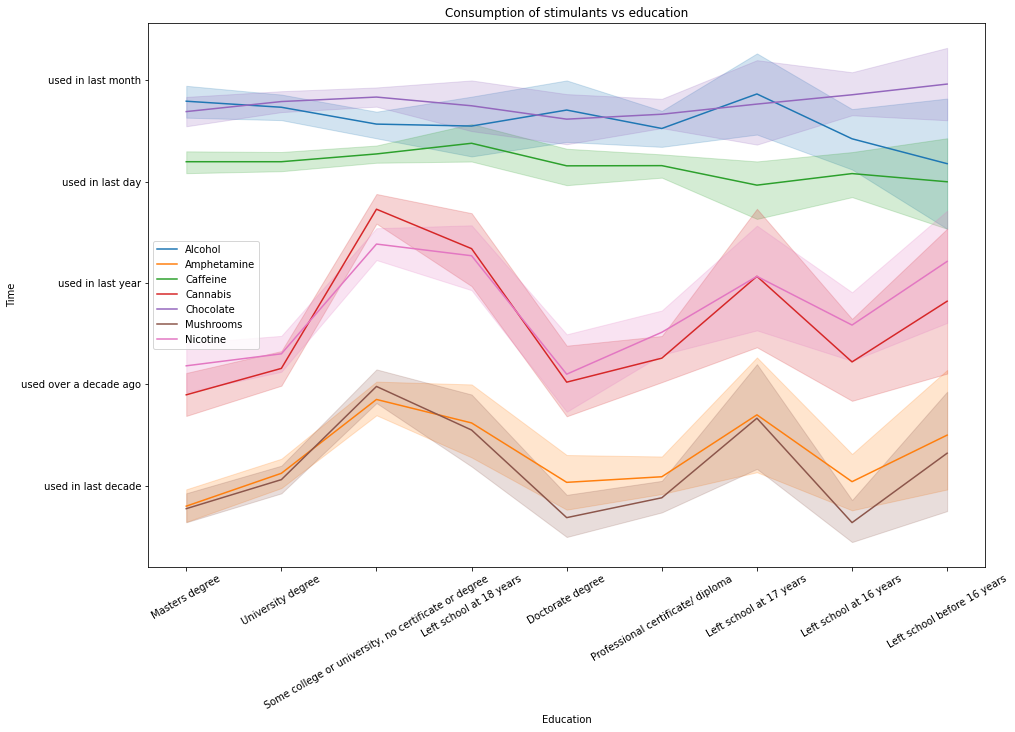

In [17]:
plt.figure(figsize=(15,10))
sns.lineplot(data.education, data.consumption_alcohol, label='Alcohol')
sns.lineplot(data.education, data.consumption_amphetamines, label = 'Amphetamine')
sns.lineplot(data.education, data.consumption_caffeine, label = 'Caffeine')
sns.lineplot(data.education, data.consumption_cannabis, label = 'Cannabis')
sns.lineplot(data.education, data.consumption_chocolate, label = 'Chocolate')
sns.lineplot(data.education, data.consumption_mushrooms, label = 'Mushrooms')
sns.lineplot(data.education, data.consumption_nicotine, label = 'Nicotine')
plt.title('Consumption of stimulants vs education')
plt.ylabel('Time')
plt.xlabel('Education')
plt.xticks(rotation = 30)
plt.show()

OPIS

Because mixed black/asian 

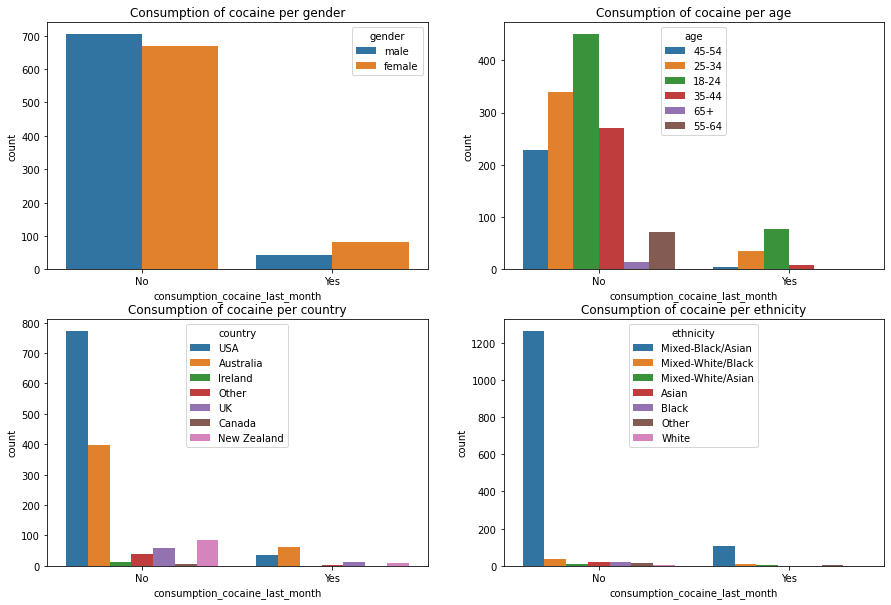

In [18]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10), sharey = False)

sns.countplot(data = data, x = data.consumption_cocaine_last_month, hue = data.gender, ax = axs[0,0])
axs[0,0].set_title("Consumption of cocaine per gender")

sns.countplot(data = data, x = data.consumption_cocaine_last_month, hue = data.age, ax = axs[0,1])
axs[0,1].set_title("Consumption of cocaine per age")

sns.countplot(data = data, x = data.consumption_cocaine_last_month, hue = data.country, ax = axs[1,0])
axs[1,0].set_title("Consumption of cocaine per country")

sns.countplot(data = data, x = data.consumption_cocaine_last_month, hue = data.ethnicity, ax = axs[1,1])
axs[1,1].set_title("Consumption of cocaine per ethnicity")


# Comparison of consumption of cocaine per alcohol/mushrooms

# sns.countplot(data = data, x = data.consumption_mushrooms, hue = data.consumption_cocaine_last_month, ax = axs[1,0])
# axs[1,0].set_title("Consumption of cocaine per gender")

plt.show()

Since our target variable is highly unbalanced, before transforming the variables, it is useful to roughly define the characteristics of our target person who could potentially have taken cocaine in the previous month:

- cocaine users are mostly US nationals, aged 18-34

- mixed-black/asian

- most likely to be students or those with higher education

- rather emotional and impulsive

- have used at least two stimulants in the past month

## 2. Preparation of the data

### 2.1. Outliers

In [55]:
def check_outliers_zscore(temp, features):
    
    outliers_idx = []
    
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(temp[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(temp[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        outlier_list_col = temp[(temp[col] < Q1 - outlier_step) | (temp[col] > Q3 + outlier_step )].index
        outliers_idx.extend(outlier_list_col)
        
    return outliers_idx

check_outliers_zscore(train, numerical_features)

[146,
 159,
 202,
 254,
 335,
 358,
 366,
 426,
 579,
 650,
 731,
 770,
 783,
 793,
 1118,
 1334,
 1352,
 1399,
 9,
 489,
 497,
 739,
 966,
 1133,
 1145,
 1404,
 1444,
 1454,
 114,
 828,
 872,
 940,
 1021,
 1097,
 1246,
 1483,
 59,
 109,
 128,
 309,
 418,
 492,
 627,
 733,
 828,
 870,
 895,
 958,
 960,
 984,
 1152,
 1160,
 1249,
 1315,
 1365,
 1382,
 1477,
 77,
 216,
 241,
 247,
 346,
 371,
 561,
 569,
 642,
 925,
 1048,
 1099,
 1160,
 1174,
 1214,
 1270,
 1346,
 1353,
 1372,
 1386,
 1450,
 90,
 377,
 787]

There are a lot of outliers and I don't want to drop them. I will use RobustScaler.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

In [20]:
# TO DO: DO POMYSLENIA CO Z OUTLIERSAMI


### 2.2. Target variable - consumption_cocaine_last_month

In case of my target variable, I will just change it from characteric into integer.

In [21]:
final = data.copy()
final['consumption_cocaine_last_month'].replace(['Yes','No'], [1,0], inplace = True)
cocaine_rate = np.mean(final['consumption_cocaine_last_month'])
print(f'Percentage of people who dose cocaine last month is equal to: {np.round(cocaine_rate,3)}')

Percentage of people who dose cocaine last month is equal to: 0.085


### 2.3. Feature analysis

<AxesSubplot:>

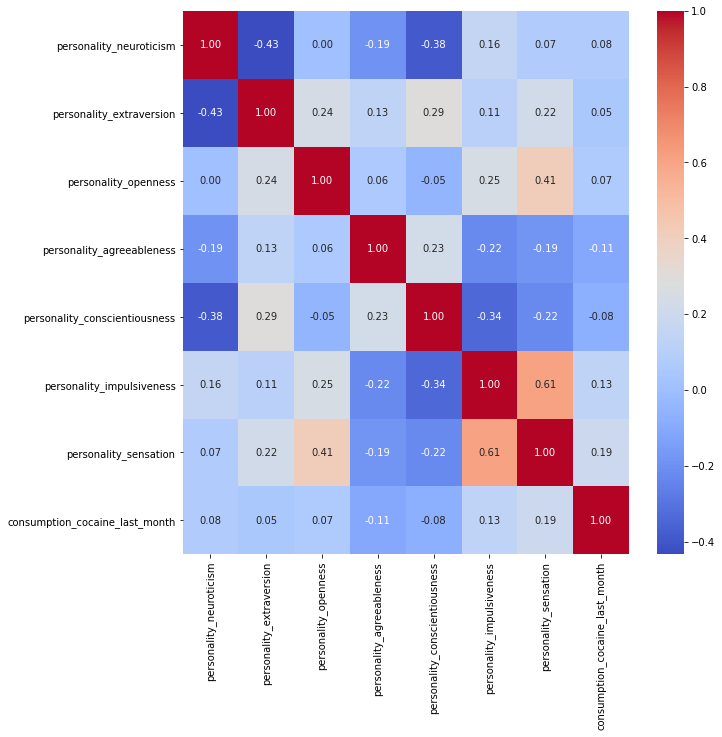

In [22]:
def corr_matrix(df):
    
    temp = final[(final['consumption_cocaine_last_month']==1) | (final['consumption_cocaine_last_month']==0)]
    plt.figure(figsize = (10,10))
    g = sns.heatmap(temp.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
    return g

corr_matrix(final)

None of the numerical variables have significant correlation with our target variable.

### 2.4. Feature engineering

https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

#### 2.4.1. Label encoding

It is used in ordinal data.

In [23]:
char_features.shape

(1885, 13)

In [24]:
def labels_encoder(df, features):
    
    le = preprocessing.LabelEncoder()
    for col in features:
        df[f'{col}_cat'] = le.fit_transform(df[col])
        
    return df
char_features_to_lab_encode = []
char_features_to_lab_encode.extend(char_features.iloc[:, [0,2]])
char_features_to_lab_encode.extend(char_features.iloc[:, 5:12])
labels_encoder(final, char_features_to_lab_encode)

,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,...,consumption_cocaine_last_month,age_cat,education_cat,consumption_alcohol_cat,consumption_amphetamines_cat,consumption_caffeine_cat,consumption_cannabis_cat,consumption_chocolate_cat,consumption_mushrooms_cat,consumption_nicotine_cat
0,45-54,male,Masters degree,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,53.7,...,0.0,3,5,4,6,1,4,1,0,4
1,25-34,male,University degree,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,56.0,...,0.0,1,8,4,0,4,0,1,0,0
2,18-24,female,University degree,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,49.9,...,0.0,0,8,3,0,1,4,4,5,3
3,25-34,female,Masters degree,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,31.8,...,0.0,1,5,1,0,1,2,1,0,2
4,18-24,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,42.4,...,0.0,0,7,4,0,3,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,35-44,male,University degree,USA,Mixed-Black/Asian,46.2,59.7,37.2,54.2,71.1,...,NaN,2,8,4,0,3,0,4,0,2
381,25-34,male,Professional certificate/ diploma,USA,Mixed-Black/Asian,49.2,74.2,52.7,51.9,44.1,...,NaN,1,6,1,6,1,2,1,0,2
382,35-44,male,Masters degree,USA,Mixed-Black/Asian,62.3,85.5,55.3,76.2,51.8,...,NaN,2,5,4,0,1,6,0,0,1
383,65+,male,Masters degree,USA,Mixed-Black/Asian,53.4,33.3,45.7,43.5,53.7,...,NaN,5,5,1,0,1,0,4,0,6


#### 2.4.2. One hot encoding

In [ ]:
ohe_columns = ['gender', 'country','ethnicity']
final = pd.get_dummies(final, columns = ohe_columns, drop_first=True)

In [26]:
# In final I will store everything, so I will have an opportunity too look, what the char data looked like
final_to_model = final.copy()
final_to_model.drop(columns = char_features_to_lab_encode,inplace=True)
final_to_model.sample()

,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_cocaine_last_month,age_cat,education_cat,...,country_New Zealand,country_Other,country_UK,country_USA,ethnicity_Black,ethnicity_Mixed-Black/Asian,ethnicity_Mixed-White/Asian,ethnicity_Mixed-White/Black,ethnicity_Other,ethnicity_White
1017,37.7,31.2,41.4,34.5,58.4,33.8,38.8,1.0,0,3,...,0,0,0,0,0,1,0,0,0,0


#### 2.4.3. Transformations

In [33]:
final_to_model.head()

,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_cocaine_last_month,age_cat,education_cat,...,country_New Zealand,country_Other,country_UK,country_USA,ethnicity_Black,ethnicity_Mixed-Black/Asian,ethnicity_Mixed-White/Asian,ethnicity_Mixed-White/Black,ethnicity_Other,ethnicity_White
0,57.6,57.3,50.1,47.8,53.7,42.8,22.4,0.0,3,5,...,0,0,0,1,0,1,0,0,0,0
1,47.8,67.0,45.7,47.8,56.0,33.8,30.8,0.0,1,8,...,0,0,0,1,0,1,0,0,0,0
2,57.6,43.3,55.3,45.6,49.9,63.0,62.0,0.0,0,8,...,0,0,0,1,0,1,0,0,0,0
3,71.8,31.2,43.6,56.3,31.8,63.0,71.1,0.0,1,5,...,0,0,0,1,0,1,0,0,0,0
4,56.1,62.3,70.2,66.1,42.4,50.4,62.0,0.0,0,7,...,0,0,0,0,0,1,0,0,0,0


Before deciding, which variables should be transformed, let's check distributions for numerical variables.

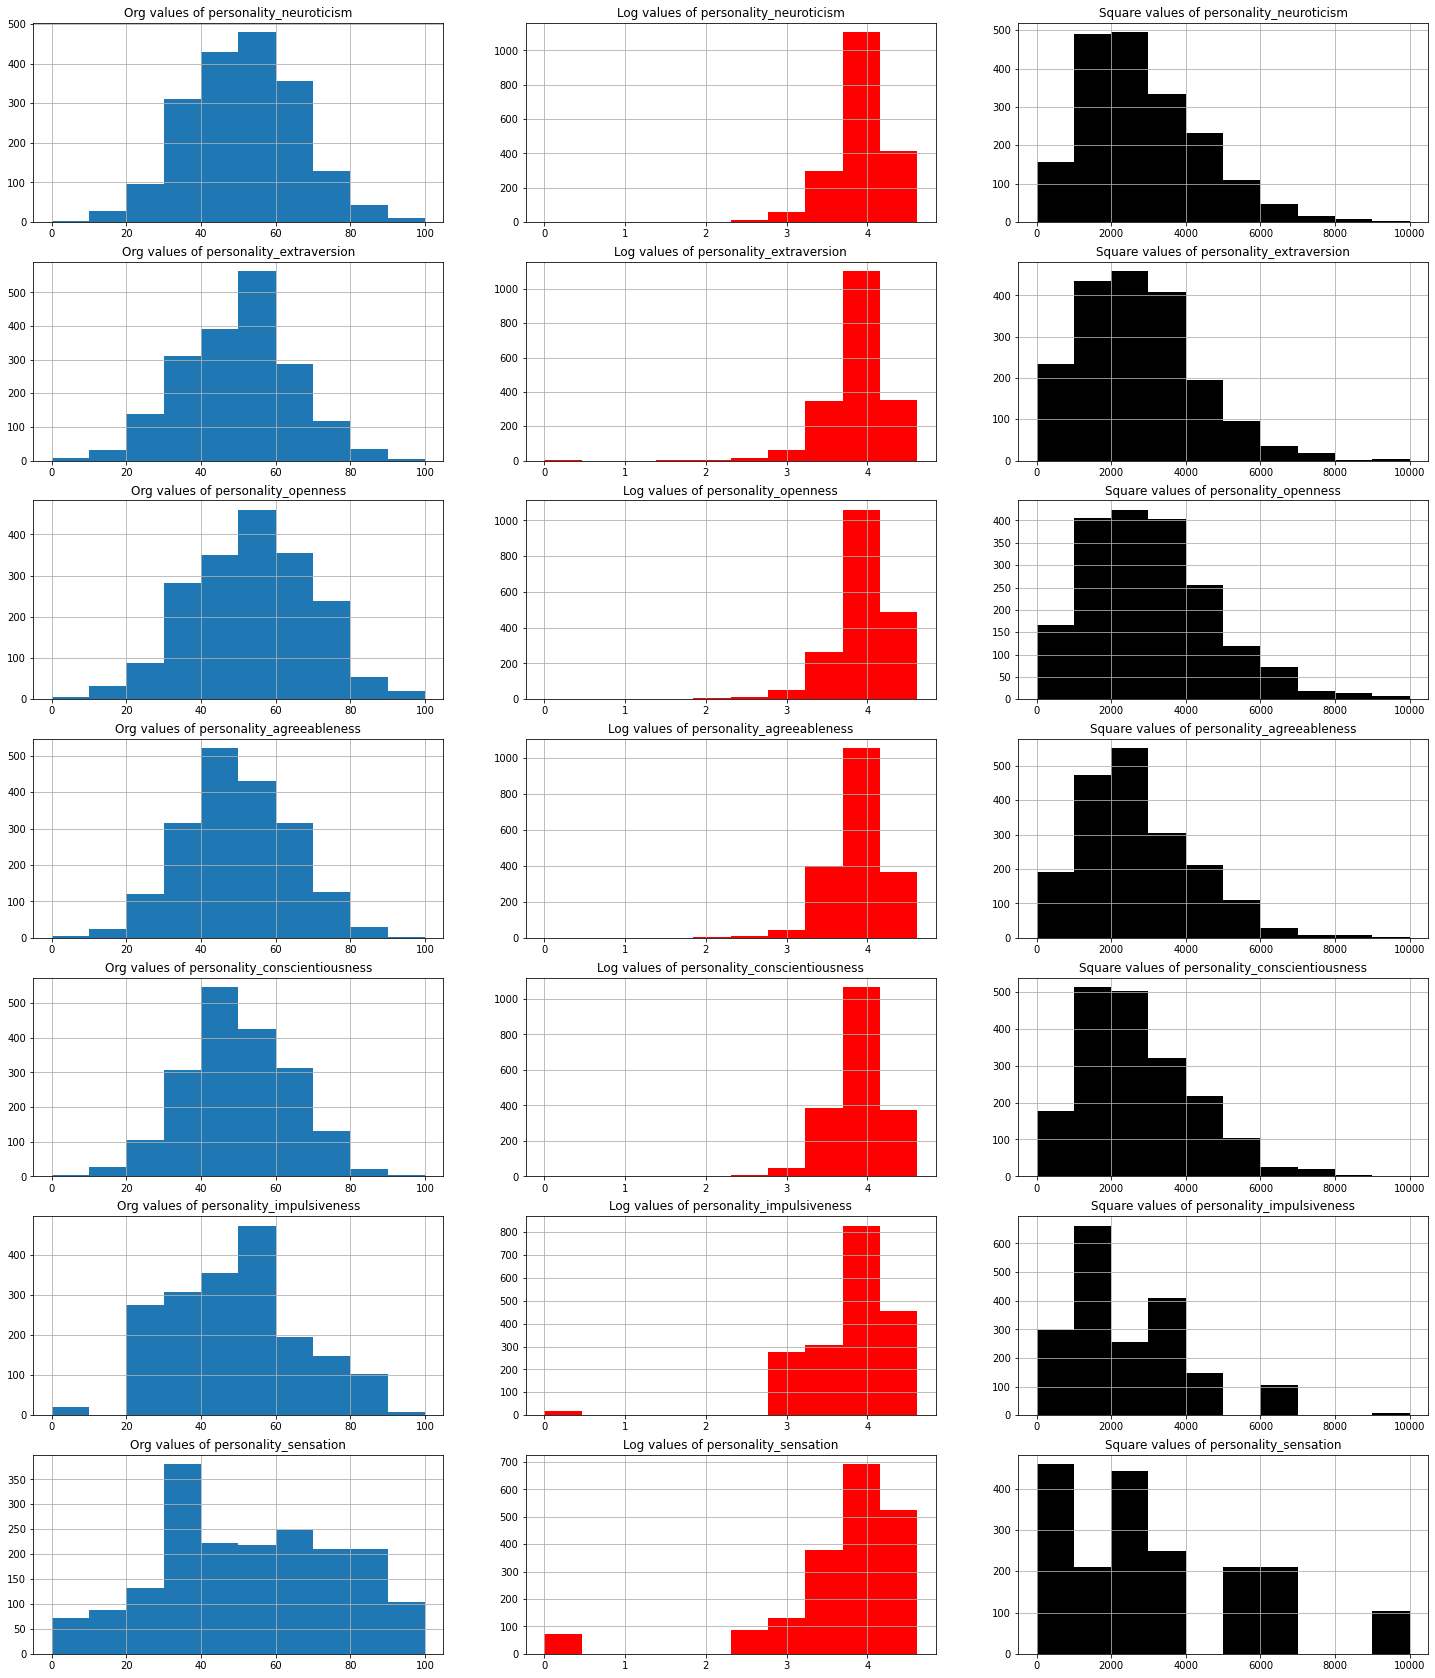

In [54]:
def plot_histograms(num_vars_to_loop):
    
    rows = len(num_vars_to_loop)
    fig, axs = plt.subplots(rows, 3, figsize = (25,30))
    
    for loop_over_numerical in range(0, rows):
        org_values = final_to_model[num_vars_to_loop[loop_over_numerical]]
        log_values = np.log1p(final_to_model[num_vars_to_loop[loop_over_numerical]])
        square_values = np.power(final_to_model[num_vars_to_loop[loop_over_numerical]],2)
        
        axs[loop_over_numerical][0].hist(org_values)
        axs[loop_over_numerical][0].set_title(f'Org values of {num_vars_to_loop[loop_over_numerical]}')
        axs[loop_over_numerical][0].grid()
        
        axs[loop_over_numerical][1].hist(log_values, color = 'red')
        axs[loop_over_numerical][1].set_title(f'Log values of {num_vars_to_loop[loop_over_numerical]}')
        axs[loop_over_numerical][1].grid()
        
        axs[loop_over_numerical][2].hist(square_values, color = 'black')
        axs[loop_over_numerical][2].set_title(f'Square values of {num_vars_to_loop[loop_over_numerical]}')
        axs[loop_over_numerical][2].grid()
                                        
plot_histograms(numerical_features)

As you can see, a possible transformation of the variables, either by logarithm or by raising the square, would only make our data worse. Therefore, no variables were transformed.

## 3. Modelling

In [59]:
train = final_to_model[:len(train)]
test = final_to_model[len(train):]
test.drop(labels=['consumption_cocaine_last_month'], axis = 1, inplace = True)

train['consumption_cocaine_last_month'] = train['consumption_cocaine_last_month'].astype(int)
Y_train = train['consumption_cocaine_last_month']
X_train = train.drop(labels = ['consumption_cocaine_last_month'], axis = 1)

### 3.1. K-Fold

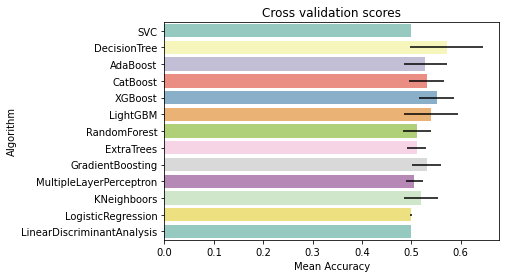

In [60]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 0
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=random_state),random_state=random_state))
classifiers.append(CatBoostClassifier(random_state=random_state))
classifiers.append(xgb.XGBClassifier(random_state=random_state))
classifiers.append(lgb.LGBMClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers:
    # define the pipeline
    steps = list()
    steps.append(('scaler', RobustScaler())) # Because of many outliers
    steps.append(('select', SelectKBest(mutual_info_classif, k=10))) # Features selection
    steps.append(('model', classifier))
    pipeline = Pipeline(steps=steps)
    cv_results.append(cross_val_score(pipeline, X_train, y = Y_train, scoring = "balanced_accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValErrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost","CatBoost","XGBoost","LightGBM",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [61]:
cv_res.sort_values('CrossValMeans', ascending = False)

,CrossValMeans,CrossValErrors,Algorithm
1,0.571320,0.074263,DecisionTree
4,0.551303,0.035500,XGBoost
5,0.539237,0.055109,LightGBM
8,0.530964,0.028988,GradientBoosting
3,0.530644,0.035749,CatBoost
2,0.527955,0.043619,AdaBoost
10,0.519175,0.034238,KNeighboors
6,0.511673,0.028429,RandomForest
7,0.510522,0.019657,ExtraTrees
9,0.505641,0.017310,MultipleLayerPerceptron


### 3.2. Tuning of hyperparameters

In [ ]:
# AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=0)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[10,50,100,500],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 1]}

grid_ADA = GridSearchCV(ada,param_grid = ada_param_grid, cv=5, scoring="balanced_accuracy")
grid_ADA.fit(X_train, Y_train)

# SVC
grid_param_SVC = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              'probability':[True]}
grid_SVC = GridSearchCV(SVC(), grid_param_SVC, scoring = 'balanced_accuracy', cv=5)
grid_SVC.fit(X_train, Y_train)

# KNN
grid_param_KNN = {'n_neighbors': [1,2,3,4,5,6,7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
grid_KNN = GridSearchCV(KNeighborsClassifier(), grid_param_KNN, scoring = 'balanced_accuracy', cv=5)
grid_KNN.fit(X_train, Y_train)

#LDA
grid_param_LDA = {'solver':['svd', 'lsqr', 'eigen']}
grid_LDA = GridSearchCV(LinearDiscriminantAnalysis(), grid_param_LDA, scoring = 'balanced_accuracy', cv=5)
grid_LDA.fit(X_train, Y_train)

### 3.3. Voting Classifier

# SVC PSUJE WYNIK, TO DO: POMYSLEC CO Z TYM ZROBIC

In [ ]:
votingClassifier_soft = VotingClassifier(estimators=[('ada', grid_ADA.best_estimator_),
('knn', grid_KNN.best_estimator_), ('lda', grid_LDA.best_estimator_)], voting='soft')
vc_soft_final = votingClassifier_soft.fit(X_train, Y_train)
test_cocaine_consumption = pd.Series(vc_soft_final.predict(test), name="consumption_cocaine_last_month")


results = pd.concat([test_org["id"], test_cocaine_consumption], axis=1)
results

### TESTING

In [58]:
# Check, gdy wyrzuce outliersy

# ZROBIE TEST I ICH WYRZUCE< ZOBACZYMY JAKI WYJDZIE WYNIKi
train.drop(check_outliers_zscore(train, numerical_features), axis=0, inplace=True)

train

,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_cocaine_last_month,age_cat,education_cat,...,country_New Zealand,country_Other,country_UK,country_USA,ethnicity_Black,ethnicity_Mixed-Black/Asian,ethnicity_Mixed-White/Asian,ethnicity_Mixed-White/Black,ethnicity_Other,ethnicity_White
0,57.6,57.3,50.1,47.8,53.7,42.8,22.4,0,3,5,...,0,0,0,1,0,1,0,0,0,0
1,47.8,67.0,45.7,47.8,56.0,33.8,30.8,0,1,8,...,0,0,0,1,0,1,0,0,0,0
2,57.6,43.3,55.3,45.6,49.9,63.0,62.0,0,0,8,...,0,0,0,1,0,1,0,0,0,0
3,71.8,31.2,43.6,56.3,31.8,63.0,71.1,0,1,5,...,0,0,0,1,0,1,0,0,0,0
4,56.1,62.3,70.2,66.1,42.4,50.4,62.0,0,0,7,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,50.6,67.0,30.0,43.5,38.7,63.0,82.6,1,0,5,...,0,0,0,1,0,1,0,0,0,0
1496,63.7,59.7,57.8,34.5,30.0,33.8,46.6,0,0,7,...,1,0,0,0,0,1,0,0,0,0
1497,31.7,54.9,41.4,30.6,56.0,56.5,82.6,0,2,8,...,0,1,0,0,0,1,0,0,0,0
1498,41.3,41.2,47.9,54.2,66.4,33.8,46.6,0,3,6,...,0,0,0,1,0,1,0,0,0,0


In [57]:
len(check_outliers_zscore(train, numerical_features))

81